In [1]:
import numpy as np
import matplotlib.pyplot as plt

Threshold reached at time 0.931 s


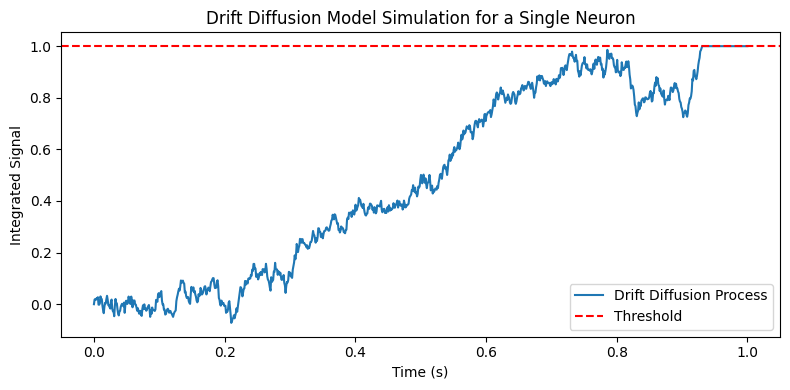

In [3]:


# Simulation parameters
T = 1.0          # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
mu = 1.0         # drift rate (input current strength)
sigma = 0.5      # diffusion coefficient (noise amplitude)
threshold = 1.0 # decision threshold

# Initialize the decision variable array
x = np.zeros(N)

# Simulate the drift diffusion process using Euler–Maruyama integration
for i in range(1, N):
    # Incremental change: deterministic drift + stochastic diffusion
    dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
    x[i] = x[i-1] + dx

    # Check if the threshold is reached, then stop the integration
    if x[i] >= threshold:
        x[i:] = threshold  # hold the value after crossing the threshold
        print(f"Threshold reached at time {time[i]:.3f} s")
        break

# Plot the trajectory of the decision variable
plt.figure(figsize=(8, 4))
plt.plot(time, x, label="Drift Diffusion Process")
plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Integrated Signal")
plt.title("Drift Diffusion Model Simulation for a Single Neuron")
plt.legend()
plt.tight_layout()
plt.show()


Neuron 1 reached threshold at time 0.937 s
Neuron 2 did not reach threshold.


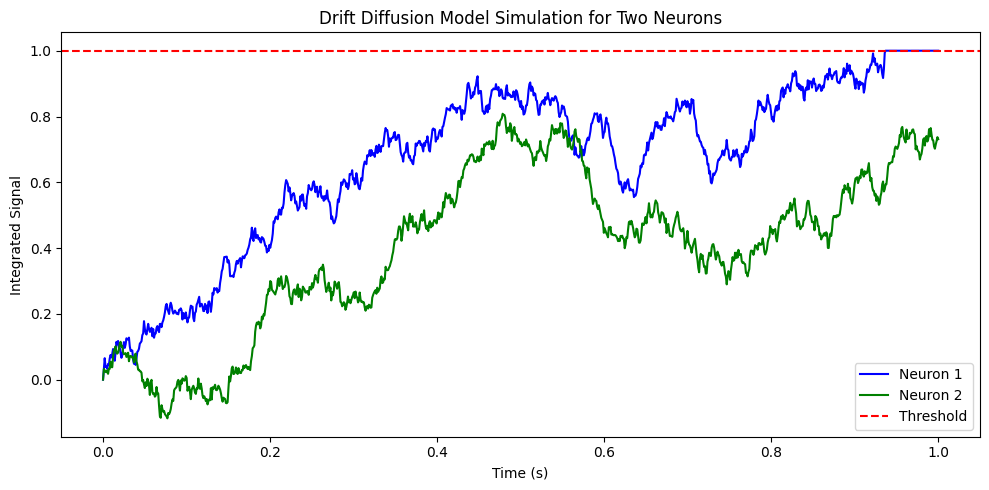

In [4]:
# Simulation parameters
T = 1.0          # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
mu = 1.0         # drift rate (input current strength)
sigma = 0.5      # diffusion coefficient (noise amplitude)
threshold = 1.0  # decision threshold

# Number of neurons (accumulators)
num_neurons = 2

# Initialize accumulator array for two neurons (each row is a neuron, each column a time point)
x = np.zeros((num_neurons, N))
# Array to record if a neuron has crossed the threshold
threshold_crossed = np.zeros(num_neurons, dtype=bool)
# Array to record the time at which each neuron crossed the threshold
crossing_time = np.full(num_neurons, np.nan)

# Simulate the drift diffusion process for both neurons
for i in range(1, N):
    for neuron in range(num_neurons):
        # Only update the neuron if it hasn't already crossed threshold
        if not threshold_crossed[neuron]:
            dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x[neuron, i] = x[neuron, i-1] + dx

            # Check if the threshold is reached
            if x[neuron, i] >= threshold:
                x[neuron, i:] = threshold  # hold the value after threshold is reached
                threshold_crossed[neuron] = True
                crossing_time[neuron] = time[i]
        else:
            # If already crossed, maintain the threshold value
            x[neuron, i] = threshold

    # Optional: if both neurons have crossed threshold, you could stop the simulation early
    if np.all(threshold_crossed):
        break

# Report threshold crossing times
for neuron in range(num_neurons):
    if not np.isnan(crossing_time[neuron]):
        print(f"Neuron {neuron+1} reached threshold at time {crossing_time[neuron]:.3f} s")
    else:
        print(f"Neuron {neuron+1} did not reach threshold.")

# Plot the trajectories of both neurons
plt.figure(figsize=(10, 5))
colors = ['blue', 'green']
for neuron in range(num_neurons):
    plt.plot(time, x[neuron], label=f"Neuron {neuron+1}", color=colors[neuron])
plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Integrated Signal")
plt.title("Drift Diffusion Model Simulation for Two Neurons")
plt.legend()
plt.tight_layout()
plt.show()

Neuron 1 reached threshold at time 0.311 s


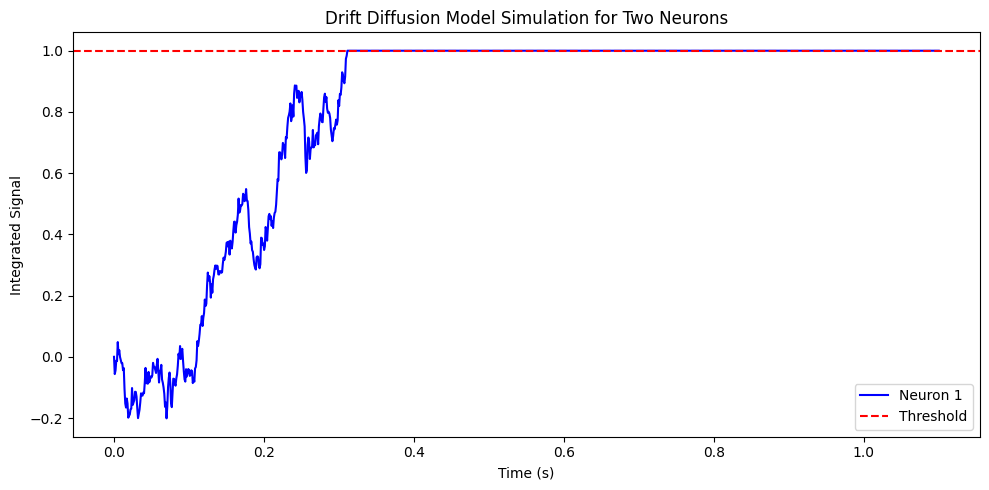

In [9]:


# Simulation parameters
T = 1.10         # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
mu = 1.0         # drift rate (input current strength)
sigma = 1.0      # noise standard deviation (now using a Gaussian with std 1)
threshold = 1.0  # decision threshold

# Number of neurons (accumulators)
num_neurons = 1

# Initialize accumulator array for two neurons (each row is a neuron, each column a time point)
x = np.zeros((num_neurons, N))
# Array to record if a neuron has crossed the threshold
threshold_crossed = np.zeros(num_neurons, dtype=bool)
# Array to record the time at which each neuron crossed the threshold
crossing_time = np.full(num_neurons, np.nan)

# Simulate the drift diffusion process for both neurons
for i in range(1, N):
    for neuron in range(num_neurons):
        # Only update the neuron if it hasn't already crossed threshold
        if not threshold_crossed[neuron]:
            dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x[neuron, i] = x[neuron, i-1] + dx

            # Check if the threshold is reached
            if x[neuron, i] >= threshold:
                x[neuron, i:] = threshold  # hold the value after threshold is reached
                threshold_crossed[neuron] = True
                crossing_time[neuron] = time[i]
        else:
            # If already crossed, maintain the threshold value
            x[neuron, i] = threshold

    # Optional: if both neurons have crossed threshold, you could stop the simulation early
    if np.all(threshold_crossed):
        break

# Report threshold crossing times
for neuron in range(num_neurons):
    if not np.isnan(crossing_time[neuron]):
        print(f"Neuron {neuron+1} reached threshold at time {crossing_time[neuron]:.3f} s")
    else:
        print(f"Neuron {neuron+1} did not reach threshold.")

# Plot the trajectories of both neurons
plt.figure(figsize=(10, 5))
colors = ['blue', 'green']
for neuron in range(num_neurons):
    plt.plot(time, x[neuron], label=f"Neuron {neuron+1}", color=colors[neuron])
plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Integrated Signal")
plt.title("Drift Diffusion Model Simulation for Two Neurons")
plt.legend()
plt.tight_layout()
plt.show()


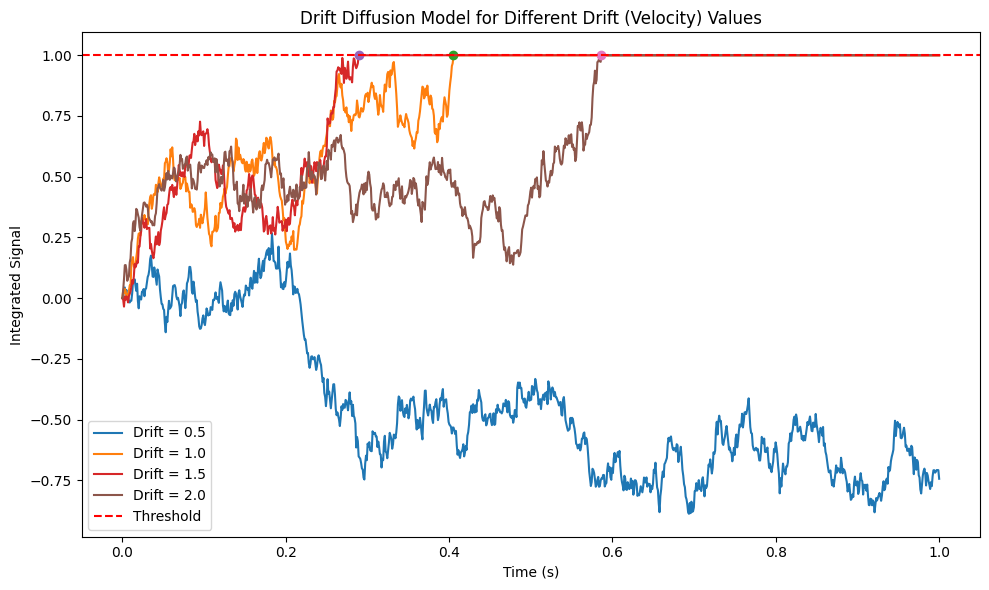

In [10]:


# Simulation parameters
T = 1.0          # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
sigma = 1.0      # noise standard deviation (Gaussian noise with std 1)
threshold = 1.0  # decision threshold

# Different drift (velocity) values to compare
drift_values = [0.5, 1.0, 1.5, 2.0]

plt.figure(figsize=(10, 6))
for mu in drift_values:
    # Initialize the decision variable array for the current drift value
    x = np.zeros(N)
    threshold_time = None

    # Simulate the drift diffusion process using Euler–Maruyama integration
    for i in range(1, N):
        dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
        x[i] = x[i-1] + dx

        # Check if the threshold is reached; if so, hold the value constant
        if x[i] >= threshold:
            x[i:] = threshold
            threshold_time = time[i]
            break

    # Plot the trajectory for the current drift value
    plt.plot(time, x, label=f"Drift = {mu}")
    if threshold_time is not None:
        plt.plot(threshold_time, threshold, 'o')  # Mark the threshold crossing

plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Integrated Signal")
plt.title("Drift Diffusion Model for Different Drift (Velocity) Values")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0          # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
sigma = 1.0      # noise standard deviation (Gaussian noise with std 1)
threshold = 1.0  # decision threshold

# Different drift (velocity) values to compare
drift_values = [0.5, 1.0, 1.5, 2.0]

plt.figure(figsize=(10, 6))
for mu in drift_values:
    # Initialize the decision variable array for the current drift value
    x = np.zeros(N)
    threshold_time = None

    # Simulate the drift diffusion process using Euler–Maruyama integration
    for i in range(1, N):
        dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
        x[i] = x[i-1] + dx

        # Check if the threshold is reached; if so, hold the value constant
        if x[i] >= threshold:
            x[i:] = threshold
            threshold_time = time[i]
            break

    # Plot the trajectory for the current drift value
    plt.plot(time, x, label=f"Drift = {mu}")
    if threshold_time is not None:
        plt.plot(threshold_time, threshold, 'o')  # Mark the threshold crossing

plt.axhline(threshold, color='red', linestyle='--', label="Threshold")
plt.xlabel("Time (s)")
plt.ylabel("Integrated Signal")
plt.title("Drift Diffusion Model for Different Drift (Velocity) Values")
plt.legend()
plt.tight_layout()
plt.show()


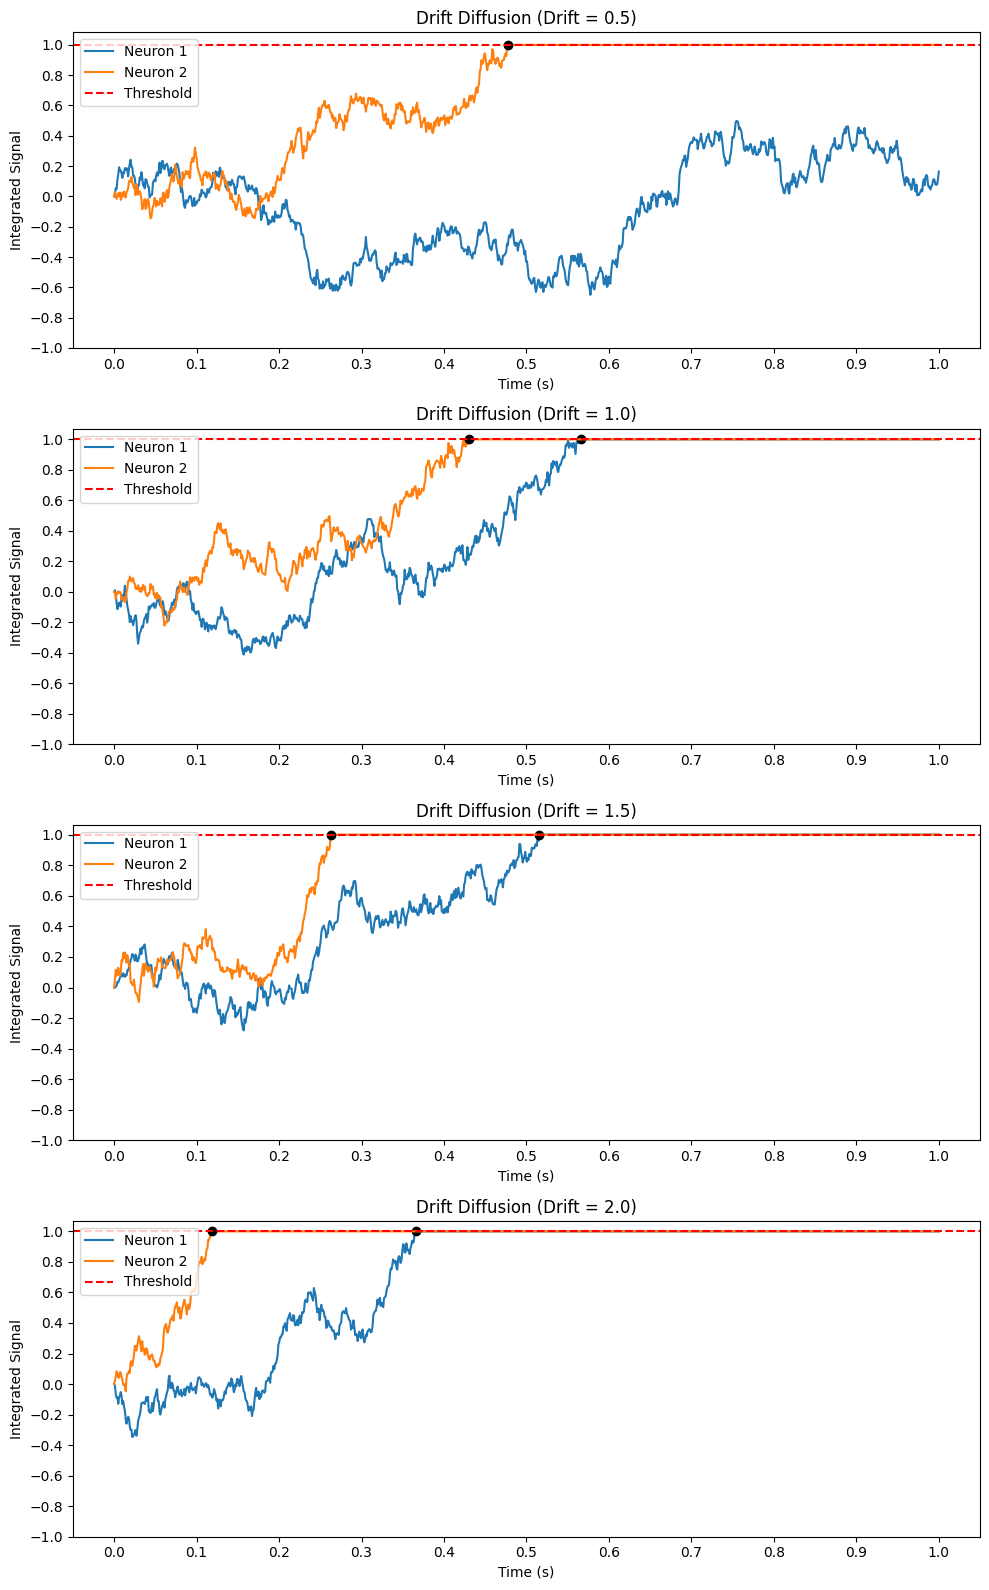

In [15]:

# Simulation parameters
T = 1.0          # total simulation time (seconds)
dt = 0.001       # time step (seconds)
N = int(T/dt)    # number of time steps
time = np.linspace(0, T, N)

# Drift diffusion model parameters
sigma = 1.0      # noise standard deviation (Gaussian noise with std 1)
threshold = 1.0  # decision threshold

# Set the number of neurons and list of drift (velocity) values
num_neurons = 2
drift_values = [0.5, 1.0, 1.5, 2.0]

# Create subplots: one subplot per drift value
fig, axes = plt.subplots(len(drift_values), 1, figsize=(10, 4 * len(drift_values)), sharex=False)

# Ensure axes is iterable if only one drift value is provided
if len(drift_values) == 1:
    axes = [axes]

# Loop over each drift value
for idx, mu in enumerate(drift_values):
    ax = axes[idx]
    
    # Simulate for each neuron with the current drift (velocity) value
    for neuron in range(num_neurons):
        x = np.zeros(N)
        threshold_time = None
        
        # Run the simulation for the current neuron
        for i in range(1, N):
            dx = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x[i] = x[i-1] + dx
            if x[i] >= threshold:
                threshold_time = time[i]
                x[i:] = threshold  # hold at threshold after crossing
                break
        
        ax.plot(time, x, label=f"Neuron {neuron+1}")
        if threshold_time is not None:
            ax.plot(threshold_time, threshold, 'ko')  # mark threshold crossing
            
    ax.axhline(threshold, color='red', linestyle='--', label="Threshold")
    ax.set_title(f"Drift Diffusion (Drift = {mu})")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Integrated Signal")
    ax.set_yticks(np.arange(-1, threshold + 0.1, 0.2))
    ax.set_xticks(np.arange(0, T + 0.1, 0.1))
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


# Bulk Simulations

In [18]:
# ----------------------
# 1) Define Parameters
# ----------------------
num_trials = 1000   # Number of repeated simulations (trials)
T = 1.0             # Total simulation time (seconds)
dt = 0.001          # Time step (seconds)
N = int(T / dt)     # Number of time steps per trial
time = np.linspace(0, T, N)

# Drift diffusion parameters
mu = 1.0            # Drift (velocity) for each neuron
sigma = 1.0         # Noise standard deviation (Gaussian with std=1)

# Thresholds for Scenario A (same) and Scenario B (different)
threshold_A = 1.0       # Scenario A threshold
threshold_B_1 = 1.0     # Scenario B threshold for neuron 1
threshold_B_2 = 1.5     # Scenario B threshold for neuron 2


In [16]:
def run_two_neuron_trial(threshold1, threshold2):
    """
    Runs a single trial of two independent drift-diffusion processes
    with the same drift (mu) and noise (sigma), but potentially different
    thresholds.
    
    Returns:
        crossing_time_1, crossing_time_2
    """
    x1 = 0.0  # Starting point for neuron 1
    x2 = 0.0  # Starting point for neuron 2
    crossing_time_1 = np.nan
    crossing_time_2 = np.nan
    
    for i in range(1, N):
        # Update neuron 1 if not crossed
        if x1 < threshold1:
            dx1 = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x1 += dx1
            if x1 >= threshold1:
                crossing_time_1 = time[i]
        
        # Update neuron 2 if not crossed
        if x2 < threshold2:
            dx2 = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x2 += dx2
            if x2 >= threshold2:
                crossing_time_2 = time[i]
        
        # If both have crossed, we can break early
        if (x1 >= threshold1) and (x2 >= threshold2):
            break
    
    return crossing_time_1, crossing_time_2

In [19]:
# -- Scenario A: Two neurons, same threshold --
cross_times_A_neuron1 = []
cross_times_A_neuron2 = []

for _ in range(num_trials):
    ct1, ct2 = run_two_neuron_trial(threshold_A, threshold_A)
    cross_times_A_neuron1.append(ct1)
    cross_times_A_neuron2.append(ct2)

# -- Scenario B: Two neurons, different thresholds --
cross_times_B_neuron1 = []
cross_times_B_neuron2 = []

for _ in range(num_trials):
    ct1, ct2 = run_two_neuron_trial(threshold_B_1, threshold_B_2)
    cross_times_B_neuron1.append(ct1)
    cross_times_B_neuron2.append(ct2)


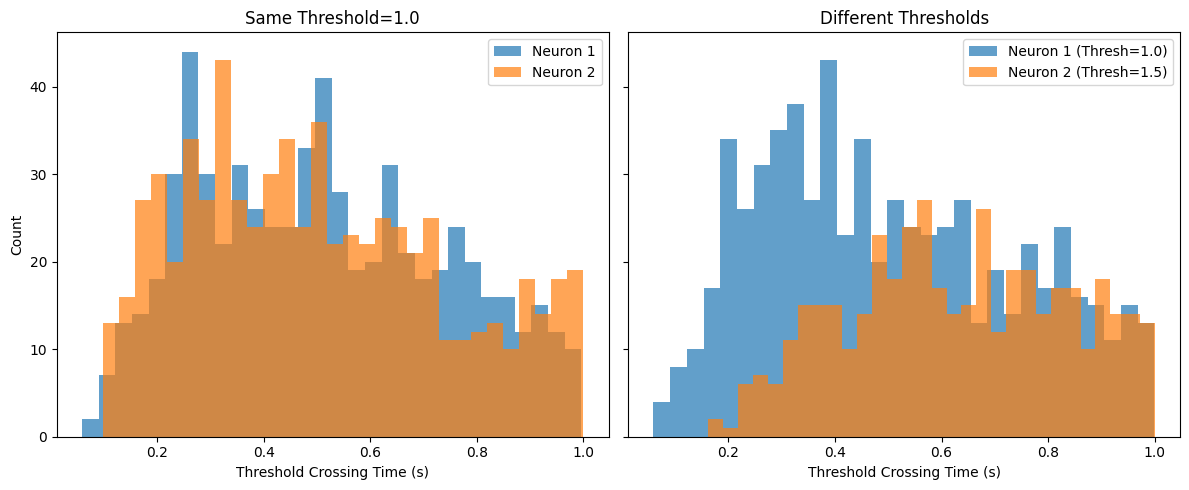

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# -- Subplot 1: Scenario A (same threshold) --
axes[0].hist(cross_times_A_neuron1, bins=30, alpha=0.7, label="Neuron 1")
axes[0].hist(cross_times_A_neuron2, bins=30, alpha=0.7, label="Neuron 2")
axes[0].set_title(f"Same Threshold={threshold_A}")
axes[0].set_xlabel("Threshold Crossing Time (s)")
axes[0].set_ylabel("Count")
axes[0].legend()

# -- Subplot 2: Scenario B (different thresholds) --
axes[1].hist(cross_times_B_neuron1, bins=30, alpha=0.7, label=f"Neuron 1 (Thresh={threshold_B_1})")
axes[1].hist(cross_times_B_neuron2, bins=30, alpha=0.7, label=f"Neuron 2 (Thresh={threshold_B_2})")
axes[1].set_title("Different Thresholds")
axes[1].set_xlabel("Threshold Crossing Time (s)")
axes[1].legend()

plt.tight_layout()
plt.show()

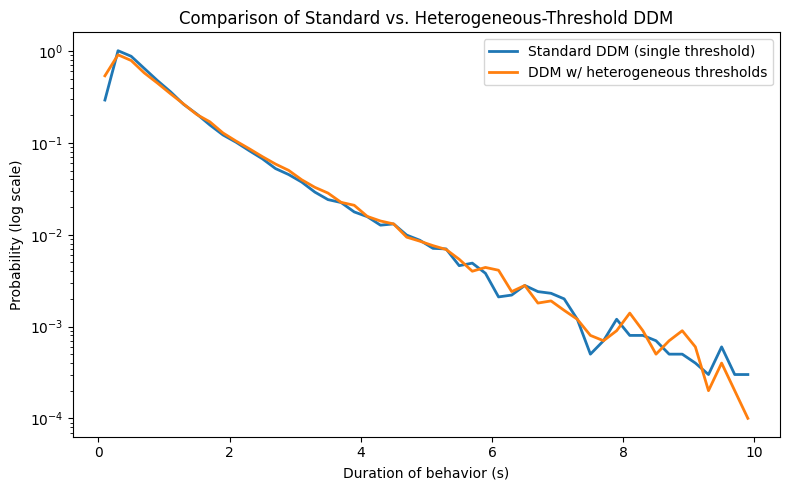

In [26]:


# -----------------------------
# 1) Basic Simulation Parameters
# -----------------------------
num_trials = 50000    # number of simulated trials
Tmax = 10.0           # maximum simulated time
dt = 0.001            # time step
N = int(Tmax / dt)    # number of time steps
time_array = np.linspace(0, Tmax, N)

# Drift-diffusion parameters
mu = 1.0              # drift (velocity)
sigma = 1.0           # noise std dev

# Threshold settings:
#   A) single threshold
threshold_single = 1.0



# ---------------------------------------
# 2) Single-Trial Drift-Diffusion Process
# ---------------------------------------
def run_ddm_trial(mu, sigma, threshold, dt, Tmax):
    """
    Run one drift-diffusion trial until the threshold is reached
    or until Tmax is exceeded. Returns crossing time or NaN if
    threshold not reached by Tmax.
    """
    x = 0.0  # state variable
    N = int(Tmax / dt)
    for i in range(N):
        # Euler–Maruyama update
        dx = mu*dt + sigma * np.sqrt(dt) * np.random.randn()
        x += dx
        # check threshold
        if x >= threshold:
            return i * dt  # crossing time
    return np.nan  # never crossed within Tmax

# -------------------------------------------------
# 3) Run Many Trials for Each Model & Record Times
# -------------------------------------------------

# (A) Standard DDM (single threshold)
cross_times_ = []
for _ in range(num_trials):
    ct = run_ddm_trial(mu, sigma, threshold_single, dt, Tmax)
    cross_times_single.append(ct)

# (B) Heterogeneous thresholds: for each trial,
#     draw a threshold from a distribution.
#     Example: truncated normal with mean=1, std=0.3 (threshold>0)


cross_times_single = np.array(cross_times_single)
cross_times_hetero = np.array(cross_times_hetero)

# -------------------------------------------------
# 4) Convert Crossing Times into a Distribution
# -------------------------------------------------
# Many ways to visualize. You could:
#   - Plot histograms (PDF approximation)
#   - Compute survival function P(Tcross > t)
#   - Plot on a log scale

# (A) Histograms of crossing times
bins = 50

# Filter out any NaN if trials didn't cross
cts_single_valid = cross_times_single[~np.isnan(cross_times_single)]
cts_hetero_valid = cross_times_hetero[~np.isnan(cross_times_hetero)]

# Compute hist counts and bin edges
counts_single, edges_single = np.histogram(cts_single_valid, bins=bins, range=(0, Tmax), density=True)
counts_hetero, edges_hetero = np.histogram(cts_hetero_valid, bins=bins, range=(0, Tmax), density=True)

# Bin centers for plotting
centers_single = 0.5 * (edges_single[:-1] + edges_single[1:])
centers_hetero = 0.5 * (edges_hetero[:-1] + edges_hetero[1:])


# --------------------------------------------
# 5) Plot Probability Distributions (PDF) on
#    a Log Scale to Mimic Your Example Figure
# --------------------------------------------
plt.figure(figsize=(8, 5))

# Plot single-threshold PDF
plt.plot(centers_single, counts_single, label="Standard DDM (single threshold)", lw=2)

# Plot heterogeneous-threshold PDF
plt.plot(centers_hetero, counts_hetero, label="DDM w/ heterogeneous thresholds", lw=2)

# Use a log scale on the y-axis
plt.yscale('log')

plt.xlabel("Duration of behavior (s)")
plt.ylabel("Probability (log scale)")
plt.title("Comparison of Standard vs. Heterogeneous-Threshold DDM")
plt.legend()
plt.tight_layout()
plt.show()


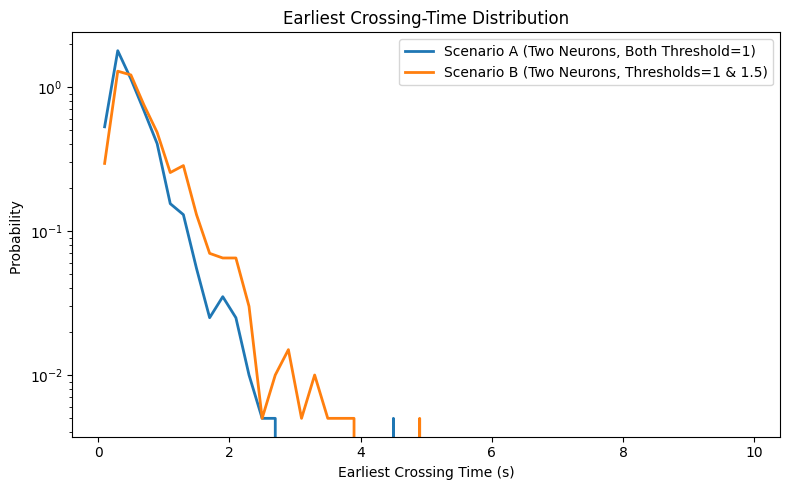

In [31]:
# -----------------------------
# 1) Simulation Parameters
# -----------------------------
num_trials = 1000   # number of trials to simulate
Tmax = 10.0          # maximum simulation time
dt = 0.001
N = int(Tmax / dt)

# Drift-diffusion parameters (same for all neurons)
mu = 1.0             # drift (velocity)
sigma = 1.0          # noise standard deviation

# Two scenarios:
#   A) Same thresholds
threshold_A1 = 1.0
threshold_A2 = 1.0

#   B) Different thresholds
threshold_B1 = 1.0
threshold_B2 = 1.5

time_array = np.linspace(0, Tmax, N)

# ------------------------------------------------------------
# 2) Function to simulate 2 neurons in parallel for one trial
# ------------------------------------------------------------
def run_ddm_trial_2neurons(thresh1, thresh2, mu, sigma, dt, Tmax):
    """
    Simulates a single trial of two parallel drift-diffusion processes.
    Returns crossing_time_1, crossing_time_2 (NaN if not crossed by Tmax).
    """
    x1, x2 = 0.0, 0.0
    N = int(Tmax / dt)
    crossing_time_1, crossing_time_2 = np.nan, np.nan

    for i in range(N):
        # Update each neuron if it hasn't crossed yet
        if x1 < thresh1:
            dx1 = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x1 += dx1
            if x1 >= thresh1:
                crossing_time_1 = i * dt

        if x2 < thresh2:
            dx2 = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
            x2 += dx2
            if x2 >= thresh2:
                crossing_time_2 = i * dt
        
        # Optional: break early if both have crossed
        if (not np.isnan(crossing_time_1)) and (not np.isnan(crossing_time_2)):
            break
    
    return crossing_time_1, crossing_time_2

# -------------------------------------------------
# 3) Run Many Trials for Each Scenario & Collect Data
# -------------------------------------------------

def run_scenario(thresh1, thresh2, mu, sigma, dt, Tmax, ntrials):
    """
    Repeats the 2-neuron simulation ntrials times,
    returns an array of 'earliest crossing times' across trials.
    """
    earliest_times = []
    for _ in range(ntrials):
        t1, t2 = run_ddm_trial_2neurons(thresh1, thresh2, mu, sigma, dt, Tmax)
        # Earliest crossing time (or NaN if neither crossed):
        #   if one neuron never crosses, min() will be NaN
        #   you could decide how to handle that (ignore or keep).
        #   Here we just store the min() as is.
        t_earliest = np.nanmin([t1, t2])
        earliest_times.append(t_earliest)
    return np.array(earliest_times)

# Scenario A: both neurons = threshold 1.0
earliest_A = run_scenario(threshold_A1, threshold_A2, mu, sigma, dt, Tmax, num_trials)

# Scenario B: thresholds = 1.0, 1.5
earliest_B = run_scenario(threshold_B1, threshold_B2, mu, sigma, dt, Tmax, num_trials)

# ------------------------------------
# 4) Build Histograms (PDF Estimate)
# ------------------------------------
bins = 50

# Keep only valid (non-NaN) crossing times
valid_A = earliest_A[~np.isnan(earliest_A)]
valid_B = earliest_B[~np.isnan(earliest_B)]

counts_A, edges_A = np.histogram(valid_A, bins=bins, range=(0, Tmax), density=True)
counts_B, edges_B = np.histogram(valid_B, bins=bins, range=(0, Tmax), density=True)

centers_A = 0.5*(edges_A[:-1] + edges_A[1:])
centers_B = 0.5*(edges_B[:-1] + edges_B[1:])

# -------------------------------------------
# 5) Plot on a Log Scale (optional)
# -------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(centers_A, counts_A, label="Scenario A (Two Neurons, Both Threshold=1)", lw=2)
plt.plot(centers_B, counts_B, label="Scenario B (Two Neurons, Thresholds=1 & 1.5)", lw=2)

# For clarity, use log scale on y-axis
plt.yscale('log')

plt.xlabel("Earliest Crossing Time (s)")
plt.ylabel("Probability ")
plt.title("Earliest Crossing-Time Distribution")
plt.legend()
plt.tight_layout()
plt.show()